<a href="https://colab.research.google.com/github/binhvd/Data-Analytics-3-Labs/blob/main/11_Time_Series_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling air pollution

Let us try to predict Beijing's air pollution, especially [PM2.5](https://en.wikipedia.org/wiki/Particulates) values in advance!


Inspiration comes from [here](https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/).

## Dataset

[Beijing PM2.5 Data Data Set](https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data)

### Columns of the dataset:

**No:** row number

**year:** year of data in this row

**month:** month of data in this row

**day:** day of data in this row

**hour:** hour of data in this row

**pm2.5:** PM2.5 concentration

**DEWP:** Dew Point

**TEMP:** Temperature

**PRES:** Pressure

**cbwd:** Combined wind direction

**Iws:** Cumulated wind speed

**Is:** Cumulated hours of snow

**Ir:** Cumulated hours of rain

In [ ]:
!pip install seglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import csv
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv

--2022-10-25 14:03:11--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2010492 (1.9M) [text/plain]
Saving to: ‘pollution.csv.1’

pollution.csv.1     100%[===================>]   1.92M  --.-KB/s    in 0.06s   

2022-10-25 14:03:12 (33.9 MB/s) - ‘pollution.csv.1’ saved [2010492/2010492]



In [ ]:
df = pd.read_csv("pollution.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [ ]:
# TODO: Drop No
...

# TODO: Create a "date" column with "year-month-day hour:minute:second"
...

# TODO: Set "date" as index and drop date
...

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,,,,,,
2010-01-01 00:00:00,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0


## Encoding day of week

We explicitly encode the day of week, since we assume that weekends and workdays behave differently.

In [ ]:
# TODO: Create a "dayofweek" column
...

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,dayofweek
date,,,,,,,,,,,,,
2010-01-01 00:00:00,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,5
2010-01-01 01:00:00,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,5
2010-01-01 02:00:00,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,5
2010-01-01 03:00:00,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,5
2010-01-01 04:00:00,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,5


# Decision about NaN-s

In [ ]:
df.isnull().sum()

year            0
month           0
day             0
hour            0
pm2.5        2067
DEWP            0
TEMP            0
PRES            0
cbwd            0
Iws             0
Is              0
Ir              0
dayofweek       0
dtype: int64

In [ ]:
def countNullEntries(df):
    return df.isnull().sum()

def countNullPercentByColumn(column):
    values = df.groupby(column)["pm2.5"]
    return values.apply(countNullEntries) / values.count() * 100.0
    
print("--------------------------------")
print("% NaN datapoints per year:", countNullPercentByColumn("year"))

print("\n--------------------------------")
print("% NaN datapoints per month:", countNullPercentByColumn("month"))

print("\n--------------------------------")
print("% NaN datapoints per dayofweek:", countNullPercentByColumn("dayofweek"))

print("\n--------------------------------")
print("% NaN datapoints per hour:", countNullPercentByColumn("hour"))


--------------------------------
% NaN datapoints per year: year
2010    8.268446
2011    9.063745
2012    5.895118
2013    0.944918
2014    1.143055
Name: pm2.5, dtype: float64

--------------------------------
% NaN datapoints per month: month
1      7.173725
2      0.326119
3      4.611924
4      5.726872
5      3.075644
6      5.726872
7      2.001645
8     11.477375
9      8.010801
10     3.939648
11     2.827763
12     5.055069
Name: pm2.5, dtype: float64

--------------------------------
% NaN datapoints per dayofweek: dayofweek
1    5.757218
2    5.596763
3    4.591752
4    3.809682
5    4.070444
6    4.977376
7    5.882353
Name: pm2.5, dtype: float64

--------------------------------
% NaN datapoints per hour: hour
0     5.244957
1     4.641834
2     5.002875
3     4.641834
4     4.701835
5     4.942529
6     4.942529
7     5.002875
8     5.063291
9     5.002875
10    5.305652
11    5.732484
12    5.488157
13    4.402516
14    5.123777
15    5.002875
16    5.123777
17    4.822

After examining the NaN values in pm2.5, we see no obvious temporal pattern. This is cause for worry, since by simply dropping the rows with NaN values, we can destroy the temporal coherence of the data, hence **data imputation is desirable.**

The autocorrelation charts below imply, that it is not unreasonable to take the previous value to fill NaN-s (high autocorrelation with the previous timestep).

In [ ]:
# TODO: Replace NULL values with the value from the previous row
...

# TODO: Drop the unfillable rows left
...

year          0
month         0
day           0
hour          0
pm2.5        24
DEWP          0
TEMP          0
PRES          0
cbwd          0
Iws           0
Is            0
Ir            0
dayofweek     0
dtype: int64


year         0
month        0
day          0
hour         0
pm2.5        0
DEWP         0
TEMP         0
PRES         0
cbwd         0
Iws          0
Is           0
Ir           0
dayofweek    0
dtype: int64


# Train, valid, test split - before normalization

Contamination by the normalization values is a distant possibility, but let's stick to paranoid practices.

In [ ]:
# TODO: Split data into train, validate, and test sets with a ratio of 8/1/1
...

We could have used `temporal_split` from `seglearn`, but that would have cast everything to numpy, so it was more convenient this way for now. Using `seglearn` is encouraged - if we would like to go into classical modeling.

# Data normalization

Our default assumption is to use Scikit's minmax scaler for easier learning by neural models.

But there are some exceptions:

## How to normalize dates?

For the year it is more tricky, it is basically an ordinal.
Subtracting the first year is nice, but how to handle the normalization to 0,1?

We could use 2018 as a max, but **WE WOULD HAVE TO WRITE A BIG CAVEAT MESSAGE FOR DEPLOY PEOPLE!**

So it should be something like  `(df.year - (df.year.min())-1)/((df.year.max()-df.year.min())*2)` (-1 is for avoiding zero, making the life of the network more easy...)

For now we stick to the minmax scaler (living risky... :-)

For month, day, hour default assumption is, scikit's minmax scaler could work, but we will choose a more elaborate solution from [here](https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/). This capitalizes on the circular nature of these quasi ordinals.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

def minmax_scale(df_x,series_y, normalizers=None):
    features_to_minmax = ["year","pm2.5","DEWP","TEMP","PRES","Iws","Is","Ir"]

    if not normalizers:
        normalizers = {}

    for feat in features_to_minmax:
        if feat not in normalizers:
            normalizers[feat] = MinMaxScaler()
            normalizers[feat].fit(df_x[feat].values.reshape(-1, 1))
        
        df_x[feat] = normalizers[feat].transform(df_x[feat].values.reshape(-1, 1))

    series_y=normalizers["pm2.5"].transform(series_y.values.reshape(-1, 1))

    return df_x, series_y, normalizers

In [ ]:
X_train_norm, y_train_norm, normalizers = minmax_scale(X_train, y_train)
X_valid_norm, y_valid_norm, _ = minmax_scale(X_valid, y_valid, normalizers=normalizers)
X_test_norm, y_test_norm, _ = minmax_scale(X_test, y_test, normalizers=normalizers)

In [ ]:
X_train_norm

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,dayofweek
date,,,,,,,,,,,,,
2010-01-02 00:00:00,0.0,1,2,0,0.129779,0.278689,0.250000,0.527273,SE,0.002290,0.000000,0.0,6
2010-01-02 01:00:00,0.0,1,2,1,0.148893,0.295082,0.250000,0.527273,SE,0.003811,0.000000,0.0,6
2010-01-02 02:00:00,0.0,1,2,2,0.159960,0.360656,0.233333,0.545455,SE,0.005332,0.000000,0.0,6
2010-01-02 03:00:00,0.0,1,2,3,0.182093,0.426230,0.233333,0.563636,SE,0.008391,0.037037,0.0,6
2010-01-02 04:00:00,0.0,1,2,4,0.138833,0.426230,0.233333,0.563636,SE,0.009912,0.074074,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,1.0,12,31,19,0.022133,0.229508,0.433333,0.400000,NW,0.195540,0.000000,0.0,2
2013-12-31 20:00:00,1.0,12,31,20,0.018109,0.196721,0.433333,0.418182,NW,0.203948,0.000000,0.0,2
2013-12-31 21:00:00,1.0,12,31,21,0.023139,0.196721,0.433333,0.418182,NW,0.213877,0.000000,0.0,2


## Encoding of ordinals

The encoding of `cbwd` is interesting, since it is an ordinal again, or better to say not even that, it has a nice circular topology, so we will use the same sin-cos solution.

Problem is, that there is a valid "zero" value, marked "cv" in there. We are tempted to replace that with 0.

In [ ]:
def encode_cyclicals(df_x):
    #"month","day","hour", "cdbw", "dayofweek"
    
    DIRECTIONS = {"N":1.0,"NE":2.0, "E":3.0, "SE":4.0, "S":5.0, "SW":6.0, "W":7.0, "NW":8.0, "cv":np.nan}

    df_x['month_sin'] = np.sin(2*np.pi*df_x.month/12)
    df_x['month_cos'] = np.cos(2*np.pi*df_x.month/12)
    df_x.drop('month', axis=1, inplace=True)
    
    df_x['day_sin'] = np.sin(2*np.pi*df_x.day/31)
    df_x['day_cos'] = np.cos(2*np.pi*df_x.day/31)
    df_x.drop('day', axis=1, inplace=True)

    df_x['dayofweek_sin'] = np.sin(2*np.pi*df_x.dayofweek/7)
    df_x['dayofweek_cos'] = np.cos(2*np.pi*df_x.dayofweek/7)
    df_x.drop('dayofweek', axis=1, inplace=True)
    
    df_x['hour_sin'] = np.sin(2*np.pi*df_x.hour/24)
    df_x['hour_cos'] = np.cos(2*np.pi*df_x.hour/24)
    df_x.drop('hour', axis=1, inplace=True)
    
    df_x.replace({'cbwd': DIRECTIONS}, inplace=True)
    df_x['cbwd'] = df_x['cbwd'].astype(np.float64) 

    df_x['cbwd_sin'] = np.sin(2.0*np.pi*df_x.cbwd/8.0)
    df_x['cbwd_sin'].replace(np.nan, 0.0, inplace=True) #Let's handle the case with no wind specially
    df_x['cbwd_cos'] = np.cos(2.0*np.pi*df_x.cbwd/8.0)
    df_x['cbwd_cos'].replace(np.nan, 0.0, inplace=True) #Let's handle the case with no wind specially
    df_x.drop('cbwd', axis=1, inplace=True)
   
    return df_x

In [ ]:
X_train_norm = encode_cyclicals(X_train_norm)
X_valid_norm = encode_cyclicals(X_valid_norm)
X_test_norm = encode_cyclicals(X_test_norm)

In [ ]:
X_train_norm

,year,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,month_sin,month_cos,day_sin,day_cos,dayofweek_sin,dayofweek_cos,hour_sin,hour_cos,cbwd_sin,cbwd_cos
date,,,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,0.0,0.129779,0.278689,0.250000,0.527273,0.002290,0.000000,0.0,5.000000e-01,0.866025,3.943559e-01,0.918958,-0.781831,0.623490,0.000000,1.000000,1.224647e-16,-1.0
2010-01-02 01:00:00,0.0,0.148893,0.295082,0.250000,0.527273,0.003811,0.000000,0.0,5.000000e-01,0.866025,3.943559e-01,0.918958,-0.781831,0.623490,0.258819,0.965926,1.224647e-16,-1.0
2010-01-02 02:00:00,0.0,0.159960,0.360656,0.233333,0.545455,0.005332,0.000000,0.0,5.000000e-01,0.866025,3.943559e-01,0.918958,-0.781831,0.623490,0.500000,0.866025,1.224647e-16,-1.0
2010-01-02 03:00:00,0.0,0.182093,0.426230,0.233333,0.563636,0.008391,0.037037,0.0,5.000000e-01,0.866025,3.943559e-01,0.918958,-0.781831,0.623490,0.707107,0.707107,1.224647e-16,-1.0
2010-01-02 04:00:00,0.0,0.138833,0.426230,0.233333,0.563636,0.009912,0.074074,0.0,5.000000e-01,0.866025,3.943559e-01,0.918958,-0.781831,0.623490,0.866025,0.500000,1.224647e-16,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-31 19:00:00,1.0,0.022133,0.229508,0.433333,0.400000,0.195540,0.000000,0.0,-2.449294e-16,1.000000,-2.449294e-16,1.000000,0.974928,-0.222521,-0.965926,0.258819,-2.449294e-16,1.0
2013-12-31 20:00:00,1.0,0.018109,0.196721,0.433333,0.418182,0.203948,0.000000,0.0,-2.449294e-16,1.000000,-2.449294e-16,1.000000,0.974928,-0.222521,-0.866025,0.500000,-2.449294e-16,1.0
2013-12-31 21:00:00,1.0,0.023139,0.196721,0.433333,0.418182,0.213877,0.000000,0.0,-2.449294e-16,1.000000,-2.449294e-16,1.000000,0.974928,-0.222521,-0.707107,0.707107,-2.449294e-16,1.0


In [ ]:
#Just in case to ensure we did everything right
assert all(x==np.float64 for x in list(X_train_norm.dtypes))

It would be worth checking with some assertions that the manual normalizers work well. Let's leave it to later work.

It is also worth noting, that the normalizers should be saved and used in production.

# Creating target (y) and "windows" (X) for modeling

By default we use the next 24 hour value of "pm2.5" for prediction, that is, I would like to predict what the pm2.5 will be like **at this hour 24 hours from now.**

We use the quite handy **seglearn** package for this.

Because of computational reasons, we **use the window of 100 hours** to predict. Classical models would have hard time to accommodate substantially (like 5-10x) context windows, LSTM-s would suffer from the challenge of long term memory. After a basic run of modeling the next big challenge would be to investigate PACF structure more and use eg. stateful LSTM modeling to try to accommodate the large "lookback".   

In [ ]:
TIME_WINDOW=100
FORECAST_DISTANCE=24

In [ ]:
from seglearn.transform import FeatureRep, SegmentXYForecast, last

segmenter = SegmentXYForecast(width=TIME_WINDOW, step=1, y_func=last, forecast=FORECAST_DISTANCE)

X_train_rolled, y_train_rolled,_=segmenter.fit_transform([X_train_norm.values],[y_train_norm.flatten()])

In [ ]:
X_train_rolled[:1]

array([[[ 0.00000000e+00,  1.29778672e-01,  2.78688525e-01, ...,
          1.00000000e+00,  1.22464680e-16, -1.00000000e+00],
        [ 0.00000000e+00,  1.48893360e-01,  2.95081967e-01, ...,
          9.65925826e-01,  1.22464680e-16, -1.00000000e+00],
        [ 0.00000000e+00,  1.59959759e-01,  3.60655738e-01, ...,
          8.66025404e-01,  1.22464680e-16, -1.00000000e+00],
        ...,
        [ 0.00000000e+00,  7.74647887e-02,  1.31147541e-01, ...,
          9.65925826e-01,  1.00000000e+00,  6.12323400e-17],
        [ 0.00000000e+00,  5.03018109e-02,  1.14754098e-01, ...,
          8.66025404e-01,  1.00000000e+00,  6.12323400e-17],
        [ 0.00000000e+00,  4.42655936e-02,  1.14754098e-01, ...,
          7.07106781e-01,  1.00000000e+00,  6.12323400e-17]]])

# Classical modeling

## Baseline - DummyPredictor

In [ ]:
X_train_rolled.shape

(34917, 100, 18)

In [ ]:
shape = X_train_rolled.shape
X_train_flattened = X_train_rolled.reshape(shape[0],shape[1]*shape[2])
X_train_flattened.shape

(34917, 1800)

In [ ]:
from sklearn.dummy import DummyRegressor

dummy_model = DummyRegressor()

dummy_model.fit(X_train_flattened, y_train_rolled)

DummyRegressor()

### Evaluation

In [ ]:
X_valid_rolled, y_valid_rolled,_=segmenter.fit_transform([X_valid_norm.values],[y_valid_norm.flatten()])

shape = X_valid_rolled.shape
X_valid_flattened = X_valid_rolled.reshape(shape[0],shape[1]*shape[2])

dummy_model_predictions = dummy_model.predict(X_valid_flattened)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms_base = sqrt(mean_squared_error(y_valid_rolled, dummy_model_predictions))

print("Root mean squared error on valid:",rms_base)
print("Root mean squared error on valid inverse transformed from normalization:",normalizers["pm2.5"].inverse_transform(np.array([rms_base]).reshape(1, -1)))

Root mean squared error on valid: 0.0986950073704243
Root mean squared error on valid inverse transformed from normalization: [[98.10283733]]


## Fitting a RandomForest on raw data

In [ ]:
from sklearn.ensemble import RandomForestRegressor

N_ESTIMATORS = 30
RANDOM_STATE = 452543634

In [ ]:
RF_base_model = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=N_ESTIMATORS, n_jobs=-1, verbose=100)

RF_base_model.fit(X_train_flattened,y_train_rolled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
building tree 1 of 30
building tree 2 of 30
building tree 3 of 30[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   33.7s

building tree 4 of 30[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   34.7s

building tree 5 of 30[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  1.1min

building tree 6 of 30[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min

building tree 7 of 30[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.7min

building tree 8 of 30[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.7min

building tree 9 of 30[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.2min

building tree 10 of 30[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  2.2min

building tree 11 of 30[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min

building tree 12 of 30[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.8min

building tree 13 of 30[Parallel(

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=452543634,
                      verbose=100)

### Evaluation

WARNING: This is just a basic evaluation scheme, more thorough investigation needed!

In [ ]:
RF_base_model_predictions = RF_base_model.predict(X_valid_flattened)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  15 tasks      | elapsed:    0.0s
[Para

In [ ]:
rms_base = sqrt(mean_squared_error(y_valid_rolled, RF_base_model_predictions))

print("Root mean squared error on valid:",rms_base)
print("Root mean squared error on valid inverse transformed from normalization:",normalizers["pm2.5"].inverse_transform(np.array([rms_base]).reshape(1, -1)))

Root mean squared error on valid: 0.08835802709609038
Root mean squared error on valid inverse transformed from normalization: [[0.08835803]]


## Fitting a RandomForest on feature transformed data

In [ ]:
RF_feature_model = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=N_ESTIMATORS, n_jobs=-1, verbose=100)

feature_converter = FeatureRep()

RF_feature_model.fit(feature_converter.fit_transform(X_train_rolled),y_train_rolled)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
building tree 1 of 30
building tree 2 of 30
building tree 3 of 30[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.5s

building tree 4 of 30[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s

building tree 5 of 30[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    9.0s

building tree 6 of 30[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.1s

building tree 7 of 30[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.3s

building tree 8 of 30[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   13.4s

building tree 9 of 30[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   17.9s

building tree 10 of 30[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   18.1s

building tree 11 of 30[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   22.4s

building tree 12 of 30[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   22.5s

building tree 13 of 30[Parallel(

RandomForestRegressor(n_estimators=30, n_jobs=-1, random_state=452543634,
                      verbose=100)

### Evaluation

WARNING: This is just a basic evaluation scheme, more thorough investigation needed!

In [ ]:
X_valid_rolled, y_valid_rolled,_=segmenter.fit_transform([X_valid_norm.values],[y_valid_norm.flatten()])

RF_feature_model_predictions = RF_feature_model.predict(feature_converter.transform(X_valid_rolled))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  11 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  13 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  15 tasks      | elapsed:    0.0s
[Para

In [ ]:
rms_feature = sqrt(mean_squared_error(y_valid_rolled, RF_feature_model_predictions))

print("Root mean squared error on valid:",rms_feature)
print("Root mean squared error on valid inverse transformed from normalization:",normalizers["pm2.5"].inverse_transform(np.array([rms_feature]).reshape(1, -1)))

Root mean squared error on valid: 0.09913531688046091
Root mean squared error on valid inverse transformed from normalization: [[98.54050498]]


(Note: In a real life scenario, I would double check if the result of check inverse_transform is what I expect to be. Most probably is, but printing out error metrics is a sensitive part, one can easily fool oneself.)

## XGBoost for speedup

In [ ]:
import xgboost as xgb

# XGBoost needs it's custom data format to run quickly
dmatrix_train = xgb.DMatrix(data=X_train_flattened,label=y_train_rolled)
dmatrix_valid = xgb.DMatrix(data=X_valid_flattened,label=y_valid_rolled)

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


In [ ]:
params = {'objective': 'reg:linear', 'eval_metric': 'rmse', 'n_estimators': 30, 'tree_method':'gpu_hist'}
#param['nthread'] = 4
evallist = [(dmatrix_valid, 'eval'), (dmatrix_train, 'train')]

#After some tests, it turned out to overfit after this point
num_round = 12

xg_reg = xgb.train(params, dmatrix_train, num_round, evallist)

[14:13:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	eval-rmse:0.290804	train-rmse:0.293582
[1]	eval-rmse:0.212453	train-rmse:0.212501
[2]	eval-rmse:0.160382	train-rmse:0.157461
[3]	eval-rmse:0.127522	train-rmse:0.121364
[4]	eval-rmse:0.109145	train-rmse:0.098278
[5]	eval-rmse:0.098193	train-rmse:0.08405
[6]	eval-rmse:0.092595	train-rmse:0.075316
[7]	eval-rmse:0.089748	train-rmse:0.070572
[8]	eval-rmse:0.088171	train-rmse:0.067781
[9]	eval-rmse:0.087828	train-rmse:0.065747
[10]	eval-rmse:0.087672	train-rmse:0.064149
[11]	eval-rmse:0.087908	train-rmse:0.063032


In [ ]:
xgb_predictions = xg_reg.predict(dmatrix_valid)

rms_base = sqrt(mean_squared_error(y_valid_rolled, xgb_predictions))

print("Root mean squared error on valid:",rms_base)
print("Root mean squared error on valid inverse transformed from normalization:",normalizers["pm2.5"].inverse_transform(np.array([rms_base]).reshape(1, -1)))

Root mean squared error on valid: 0.08790809598282114
Root mean squared error on valid inverse transformed from normalization: [[87.38064741]]


### Forcing the issue with a bit of grid search

Since XGBoost fits quite quickly, especially on GPU, we can try to poke around a small grid of parameters, and see, if we can get some better results.

In [ ]:
from sklearn.model_selection import ParameterSampler, ParameterGrid

all_params = {
        #'min_child_weight': [1, 5, 10],
        #'gamma': [0.5, 1, 1.5, 2, 5],
        #'subsample': [0.6, 0.8, 1.0],
        #'colsample_bytree': [0.6, 0.8, 1.0],
        #'max_depth': [3, 4, 5],
        'n_estimators':[30,100,200,500],
        'learning_rate':[0.01, 0.1, 0.2, 0.3],
        'objective': ['reg:linear'],
        'eval_metric': ['rmse'],
        'tree_method': ['gpu_hist'],
        }

best_score = 10000.0
run = 1

evallist = [(dmatrix_valid, 'eval'), (dmatrix_train, 'train')]
for param_sample in ParameterGrid(all_params):
    print("----RUN ",run)
    xg_reg = xgb.train(param_sample, dmatrix_train, num_round*3, evallist)
    
    xgb_predictions = xg_reg.predict(dmatrix_valid)
    score = sqrt(mean_squared_error(y_valid_rolled, xgb_predictions))

    if score < best_score:
        best_score = score
        best_model = xg_reg
    run+=1

print("Root mean squared error on valid:",best_score)
print("Root mean squared error on valid inverse transformed from normalization:",normalizers["pm2.5"].inverse_transform(np.array([best_score]).reshape(1, -1)))

----RUN  1
[14:14:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	eval-rmse:0.403765	train-rmse:0.407863
[1]	eval-rmse:0.399872	train-rmse:0.403934
[2]	eval-rmse:0.396027	train-rmse:0.400043
[3]	eval-rmse:0.392258	train-rmse:0.396196
[4]	eval-rmse:0.388515	train-rmse:0.392385
[5]	eval-rmse:0.384828	train-rmse:0.388617
[6]	eval-rmse:0.381185	train-rmse:0.384885
[7]	eval-rmse:0.37756	train-rmse:0.381194
[8]	eval-rmse:0.373959	train-rmse:0.377539
[9]	eval-rmse:0.370422	train-rmse:0.373925
[10]	eval-rmse:0.366926	train-rmse:0.370348
[11]	eval-rmse:0.363475	train-rmse:0.366805
[12]	eval-rmse:0.360035	train-rmse:0.363302
[13]	eval-rmse:0.356624	train-rmse:0.359836
[14]	eval-rmse:0.353316	train-rmse:0.356402
[15]	eval-rmse:0.34999	train-rmse:0.353004
[16]	eval-rmse:0.34669	train-rmse:0.34964
[17]	eval-rmse:0.343447	train-rmse:0.346315
[18]	eval-rmse:0.340258	train-rmse:0.343023
[19]	eval-rmse:0.337099	train-rmse:0.339

No, the answer is: We not get any better at first glance. We could try to exhaustively search all parameters, but that would take exorbitant amount of time and is not promising.

We need to try a more sophisticated model.

# Deep Learning

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D, Flatten, TimeDistributed
from tensorflow.keras import backend as be
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
BATCH_SIZE = 100
EPOCHS = 40
column_count=len(X_train_norm.columns)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience = 5)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss',patience = 2, factor = 0.8, min_lr = 0.00001)

callbacks = [earlystop, learning_rate_reduction]

## MLP for Time Series Forecasting
*   First we will use a Multilayer Perceptron model or MLP model, here our model will have input features equal to the window size.
*   The thing with MLP models is that the model don't take the input as sequenced data, so for the model, it is just receiving inputs and don't treat them as sequenced data, that may be a problem since the model won't see the data with the sequence patter that it has.

In [ ]:
# TODO: Create a model with 1 hidden layer of 100 units
model_mlp = ...

In [ ]:
mlp_history = model_mlp.fit(x=X_train_rolled,y=y_train_rolled, batch_size=BATCH_SIZE, validation_data=(X_valid_rolled,y_valid_rolled), epochs=EPOCHS, callbacks=callbacks)

Epoch 1/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0084 - val_loss: 0.0097 - lr: 0.0010
Epoch 2/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0084 - val_loss: 0.0098 - lr: 0.0010
Epoch 3/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0084 - val_loss: 0.0097 - lr: 0.0010
Epoch 4/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0084 - val_loss: 0.0096 - lr: 8.0000e-04
Epoch 5/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0084 - val_loss: 0.0097 - lr: 8.0000e-04
Epoch 6/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0084 - val_loss: 0.0097 - lr: 6.4000e-04
Epoch 7/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0084 - val_loss: 0.0097 - lr: 6.4000e-04


In [ ]:
rms_MLP = sqrt(min(mlp_history.history['val_loss']))

print("Root mean squared error on valid:",rms_MLP)
print("Root mean squared error on valid inverse transformed from normalization:",normalizers["pm2.5"].inverse_transform(np.array([rms_MLP]).reshape(1, -1)))

Root mean squared error on valid: 0.09820113755903079
Root mean squared error on valid inverse transformed from normalization: [[97.61193073]]


## CNN for Time Series Forecasting
*   For the CNN model we will use one convolutional hidden layer followed by a max pooling layer. The filter maps are then flattened before being interpreted by a Dense layer and outputting a prediction.
*   The convolutional layer should be able to identify patterns between the timesteps.

In [ ]:
# TODO: Create a CNN model with
# Conv1D layer with 64 filters and a kernel size of 2
# MaxPooling1D with a pool size of 2
# Flatten layer
# Hidden layer with 50 units

model_cnn = ...

In [ ]:
cnn_history = model_cnn.fit(x=X_train_rolled,y=y_train_rolled, batch_size=BATCH_SIZE, validation_data=(X_valid_rolled,y_valid_rolled), epochs=EPOCHS, callbacks=callbacks)

Epoch 1/40
350/350 [==============================] - 2s 4ms/step - loss: 0.0186 - val_loss: 0.0086 - lr: 0.0010
Epoch 2/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0075 - val_loss: 0.0081 - lr: 0.0010
Epoch 3/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0071 - val_loss: 0.0080 - lr: 0.0010
Epoch 4/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0069 - val_loss: 0.0081 - lr: 0.0010
Epoch 5/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0066 - val_loss: 0.0080 - lr: 0.0010
Epoch 6/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0063 - val_loss: 0.0080 - lr: 8.0000e-04
Epoch 7/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0060 - val_loss: 0.0077 - lr: 8.0000e-04
Epoch 8/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0057 - val_loss: 0.0074 - lr: 8.0000e-04
Epoch 9/40
350/350 [==============================] - 1s 4ms/step - loss: 0.0054 - v

In [ ]:
rms_CNN = sqrt(min(cnn_history.history['val_loss']))

print("Root mean squared error on valid:",rms_CNN)
print("Root mean squared error on valid inverse transformed from normalization:",normalizers["pm2.5"].inverse_transform(np.array([rms_CNN]).reshape(1, -1)))

Root mean squared error on valid: 0.09820113755903079
Root mean squared error on valid inverse transformed from normalization: [[97.61193073]]


## Building an LSTM model

We believe, that the time dependent structure of this dataset is complex, so we try to use LSTM models from Keras. We are not explicitly utilizing **statefulness**, that is a **major area to be investigated later on**.

More information on statefulness can be found [here](https://philipperemy.github.io/keras-stateful-lstm/).


In [ ]:
# TODO: Create a LSTM model with 100 LSTM cells and a Dropout layer with rate=0.2
model_lstm = ...

In [ ]:
lstm_history = model_lstm.fit(x=X_train_rolled,y=y_train_rolled, batch_size=BATCH_SIZE, validation_data=(X_valid_rolled,y_valid_rolled), epochs=EPOCHS, verbose=1, shuffle=False, callbacks=callbacks)

Epoch 1/40
350/350 [==============================] - 8s 11ms/step - loss: 0.0161 - val_loss: 0.0145 - lr: 0.0010
Epoch 2/40
350/350 [==============================] - 3s 9ms/step - loss: 0.0105 - val_loss: 0.0147 - lr: 0.0010
Epoch 3/40
350/350 [==============================] - 3s 9ms/step - loss: 0.0092 - val_loss: 0.0244 - lr: 0.0010
Epoch 4/40
350/350 [==============================] - 3s 9ms/step - loss: 0.0080 - val_loss: 0.0092 - lr: 8.0000e-04
Epoch 5/40
350/350 [==============================] - 3s 9ms/step - loss: 0.0075 - val_loss: 0.0085 - lr: 8.0000e-04
Epoch 6/40
350/350 [==============================] - 3s 9ms/step - loss: 0.0079 - val_loss: 0.0099 - lr: 8.0000e-04
Epoch 7/40
350/350 [==============================] - 3s 9ms/step - loss: 0.0078 - val_loss: 0.0078 - lr: 8.0000e-04
Epoch 8/40
350/350 [==============================] - 3s 9ms/step - loss: 0.0076 - val_loss: 0.0082 - lr: 8.0000e-04
Epoch 9/40
350/350 [==============================] - 3s 9ms/step - loss: 0

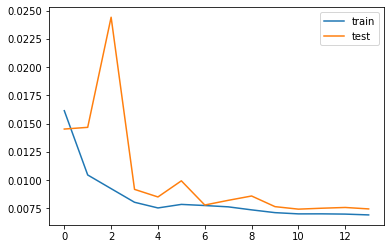

In [ ]:
plt.plot(lstm_history.history['loss'], label='train')
plt.plot(lstm_history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
rms_LSTM = sqrt(min(lstm_history.history['val_loss']))

print("Root mean squared error on valid:", rms_LSTM)
print("Root mean squared error on valid inverse transformed from normalization:",normalizers["pm2.5"].inverse_transform(np.array([rms_LSTM]).reshape(1, -1)))

Root mean squared error on valid: 0.08620900376211918
Root mean squared error on valid inverse transformed from normalization: [[85.69174974]]


## CNN-LSTM for Time Series Forecasting
*   Input shape **[samples, subsequences, timesteps, features]**.
*   Model explanation from the [article](https://machinelearningmastery.com/how-to-get-started-with-deep-learning-for-time-series-forecasting-7-day-mini-course/)
> "The benefit of this model is that the model can support very long input sequences that can be read as blocks or subsequences by the CNN model, then pieced together by the LSTM model."
> 
> "When using a hybrid CNN-LSTM model, we will further divide each sample into further subsequences. The CNN model will interpret each sub-sequence and the LSTM will piece together the interpretations from the subsequences. As such, we will split each sample into 2 subsequences of 2 times per subsequence."
> 
> "The CNN will be defined to expect 2 timesteps per subsequence with one feature. The entire CNN model is then wrapped in TimeDistributed wrapper layers so that it can be applied to each subsequence in the sample. The results are then interpreted by the LSTM layer before the model outputs a prediction."

Data preprocess
*   Reshape from [samples, timesteps, features] into [samples, subsequences, timesteps, features].

In [ ]:
X_train_rolled.shape

(34917, 100, 18)

In [ ]:
subsequences = 2
timesteps = X_train_rolled.shape[1]//subsequences
X_train_series_sub = X_train_rolled.reshape((X_train_rolled.shape[0], subsequences, timesteps, X_train_rolled.shape[2]))
X_valid_series_sub = X_valid_rolled.reshape((X_valid_rolled.shape[0], subsequences, timesteps, X_valid_rolled.shape[2]))

print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)

Train set shape (34917, 2, 50, 18)
Validation set shape (4257, 2, 50, 18)


In [ ]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer="adam")

In [ ]:
cnn_lstm_history = model_cnn_lstm.fit(x=X_train_series_sub,y=y_train_rolled, batch_size=BATCH_SIZE, validation_data=(X_valid_series_sub,y_valid_rolled), epochs=EPOCHS, callbacks=callbacks)

Epoch 1/40
350/350 [==============================] - 5s 11ms/step - loss: 0.0089 - val_loss: 0.0078 - lr: 0.0010
Epoch 2/40
350/350 [==============================] - 4s 12ms/step - loss: 0.0066 - val_loss: 0.0076 - lr: 0.0010
Epoch 3/40
350/350 [==============================] - 3s 8ms/step - loss: 0.0059 - val_loss: 0.0098 - lr: 0.0010
Epoch 4/40
350/350 [==============================] - 3s 9ms/step - loss: 0.0053 - val_loss: 0.0111 - lr: 0.0010
Epoch 5/40
350/350 [==============================] - 3s 8ms/step - loss: 0.0046 - val_loss: 0.0105 - lr: 8.0000e-04
Epoch 6/40
350/350 [==============================] - 3s 8ms/step - loss: 0.0039 - val_loss: 0.0105 - lr: 8.0000e-04
Epoch 7/40
350/350 [==============================] - 4s 13ms/step - loss: 0.0033 - val_loss: 0.0165 - lr: 6.4000e-04


In [ ]:
rms_CNN_LSTM = sqrt(min(cnn_lstm_history.history['val_loss']))

print("Root mean squared error on valid:", rms_CNN_LSTM)
print("Root mean squared error on valid inverse transformed from normalization:",normalizers["pm2.5"].inverse_transform(np.array([rms_CNN_LSTM]).reshape(1, -1)))

Root mean squared error on valid: 0.0871823354912541
Root mean squared error on valid inverse transformed from normalization: [[86.65924148]]
